In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Company_Data.csv to Company_Data.csv


In [155]:
data = pd.read_csv('Company_Data.csv')

In [156]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [158]:
data["Sales"].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [159]:
encoder =LabelEncoder()

In [160]:
col = data.select_dtypes("object")

In [161]:
col.columns

Index(['ShelveLoc', 'Urban', 'US'], dtype='object')

In [162]:
for i in col.columns:
  data[i] = encoder.fit_transform(data[i])

In [163]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [164]:
col.value_counts()

ShelveLoc  Urban  US 
Medium     Yes    Yes    96
                  No     55
Bad        Yes    Yes    51
Good       Yes    Yes    39
Medium     No     Yes    39
                  No     29
Bad        Yes    No     23
Good       No     Yes    22
           Yes    No     18
Bad        No     No     11
                  Yes    11
Good       No     No      6
dtype: int64

In [188]:
bins = np.linspace(min(data['Sales']), max(data['Sales']), 4)
# This will divide the range of values from the minimum to the maximum into four equal intervals.

In [189]:
bins

array([ 0.        ,  5.42333333, 10.84666667, 16.27      ])

In [192]:
data["sales_catagory"] = pd.cut(data["Sales"],bins=[0,5.39,9.32,16.27],labels=["Low","Medium","High"],include_lowest=True)
# bins replace the quntile values 0-25% is low 25%-75%-medium above 75% is high sales

In [193]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_catagory
0,9.50,138,73,11,276,120,0,42,17,1,1,High
1,11.22,111,48,16,260,83,1,65,10,1,1,High
2,10.06,113,35,10,269,80,2,59,12,1,1,High
3,7.40,117,100,4,466,97,2,55,14,1,1,Medium
4,4.15,141,64,3,340,128,0,38,13,1,0,Low


split the X features and Y feature


In [194]:
x = data.drop(columns=["Sales","sales_catagory"],axis=1)

In [195]:
x.sample()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
397,162,26,12,368,159,2,40,18,1,1


In [196]:
data["sales_catagory"] = encoder.fit_transform(data["sales_catagory"])

In [197]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_catagory
0,9.50,138,73,11,276,120,0,42,17,1,1,0
1,11.22,111,48,16,260,83,1,65,10,1,1,0
2,10.06,113,35,10,269,80,2,59,12,1,1,0
3,7.40,117,100,4,466,97,2,55,14,1,1,2
4,4.15,141,64,3,340,128,0,38,13,1,0,1


In [198]:
y = data["sales_catagory"]

Split the data into test & train

In [199]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=20)

In [200]:
y.value_counts()

2    201
1    100
0     99
Name: sales_catagory, dtype: int64

<Axes: xlabel='sales_catagory', ylabel='count'>

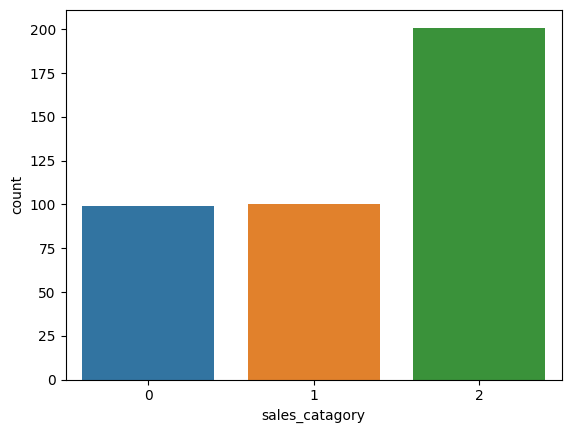

In [215]:
sns.countplot(x="sales_catagory",data=data)

Create the model

In [201]:
model = DecisionTreeClassifier()

In [202]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [203]:
import matplotlib.pyplot as plt
from sklearn import tree

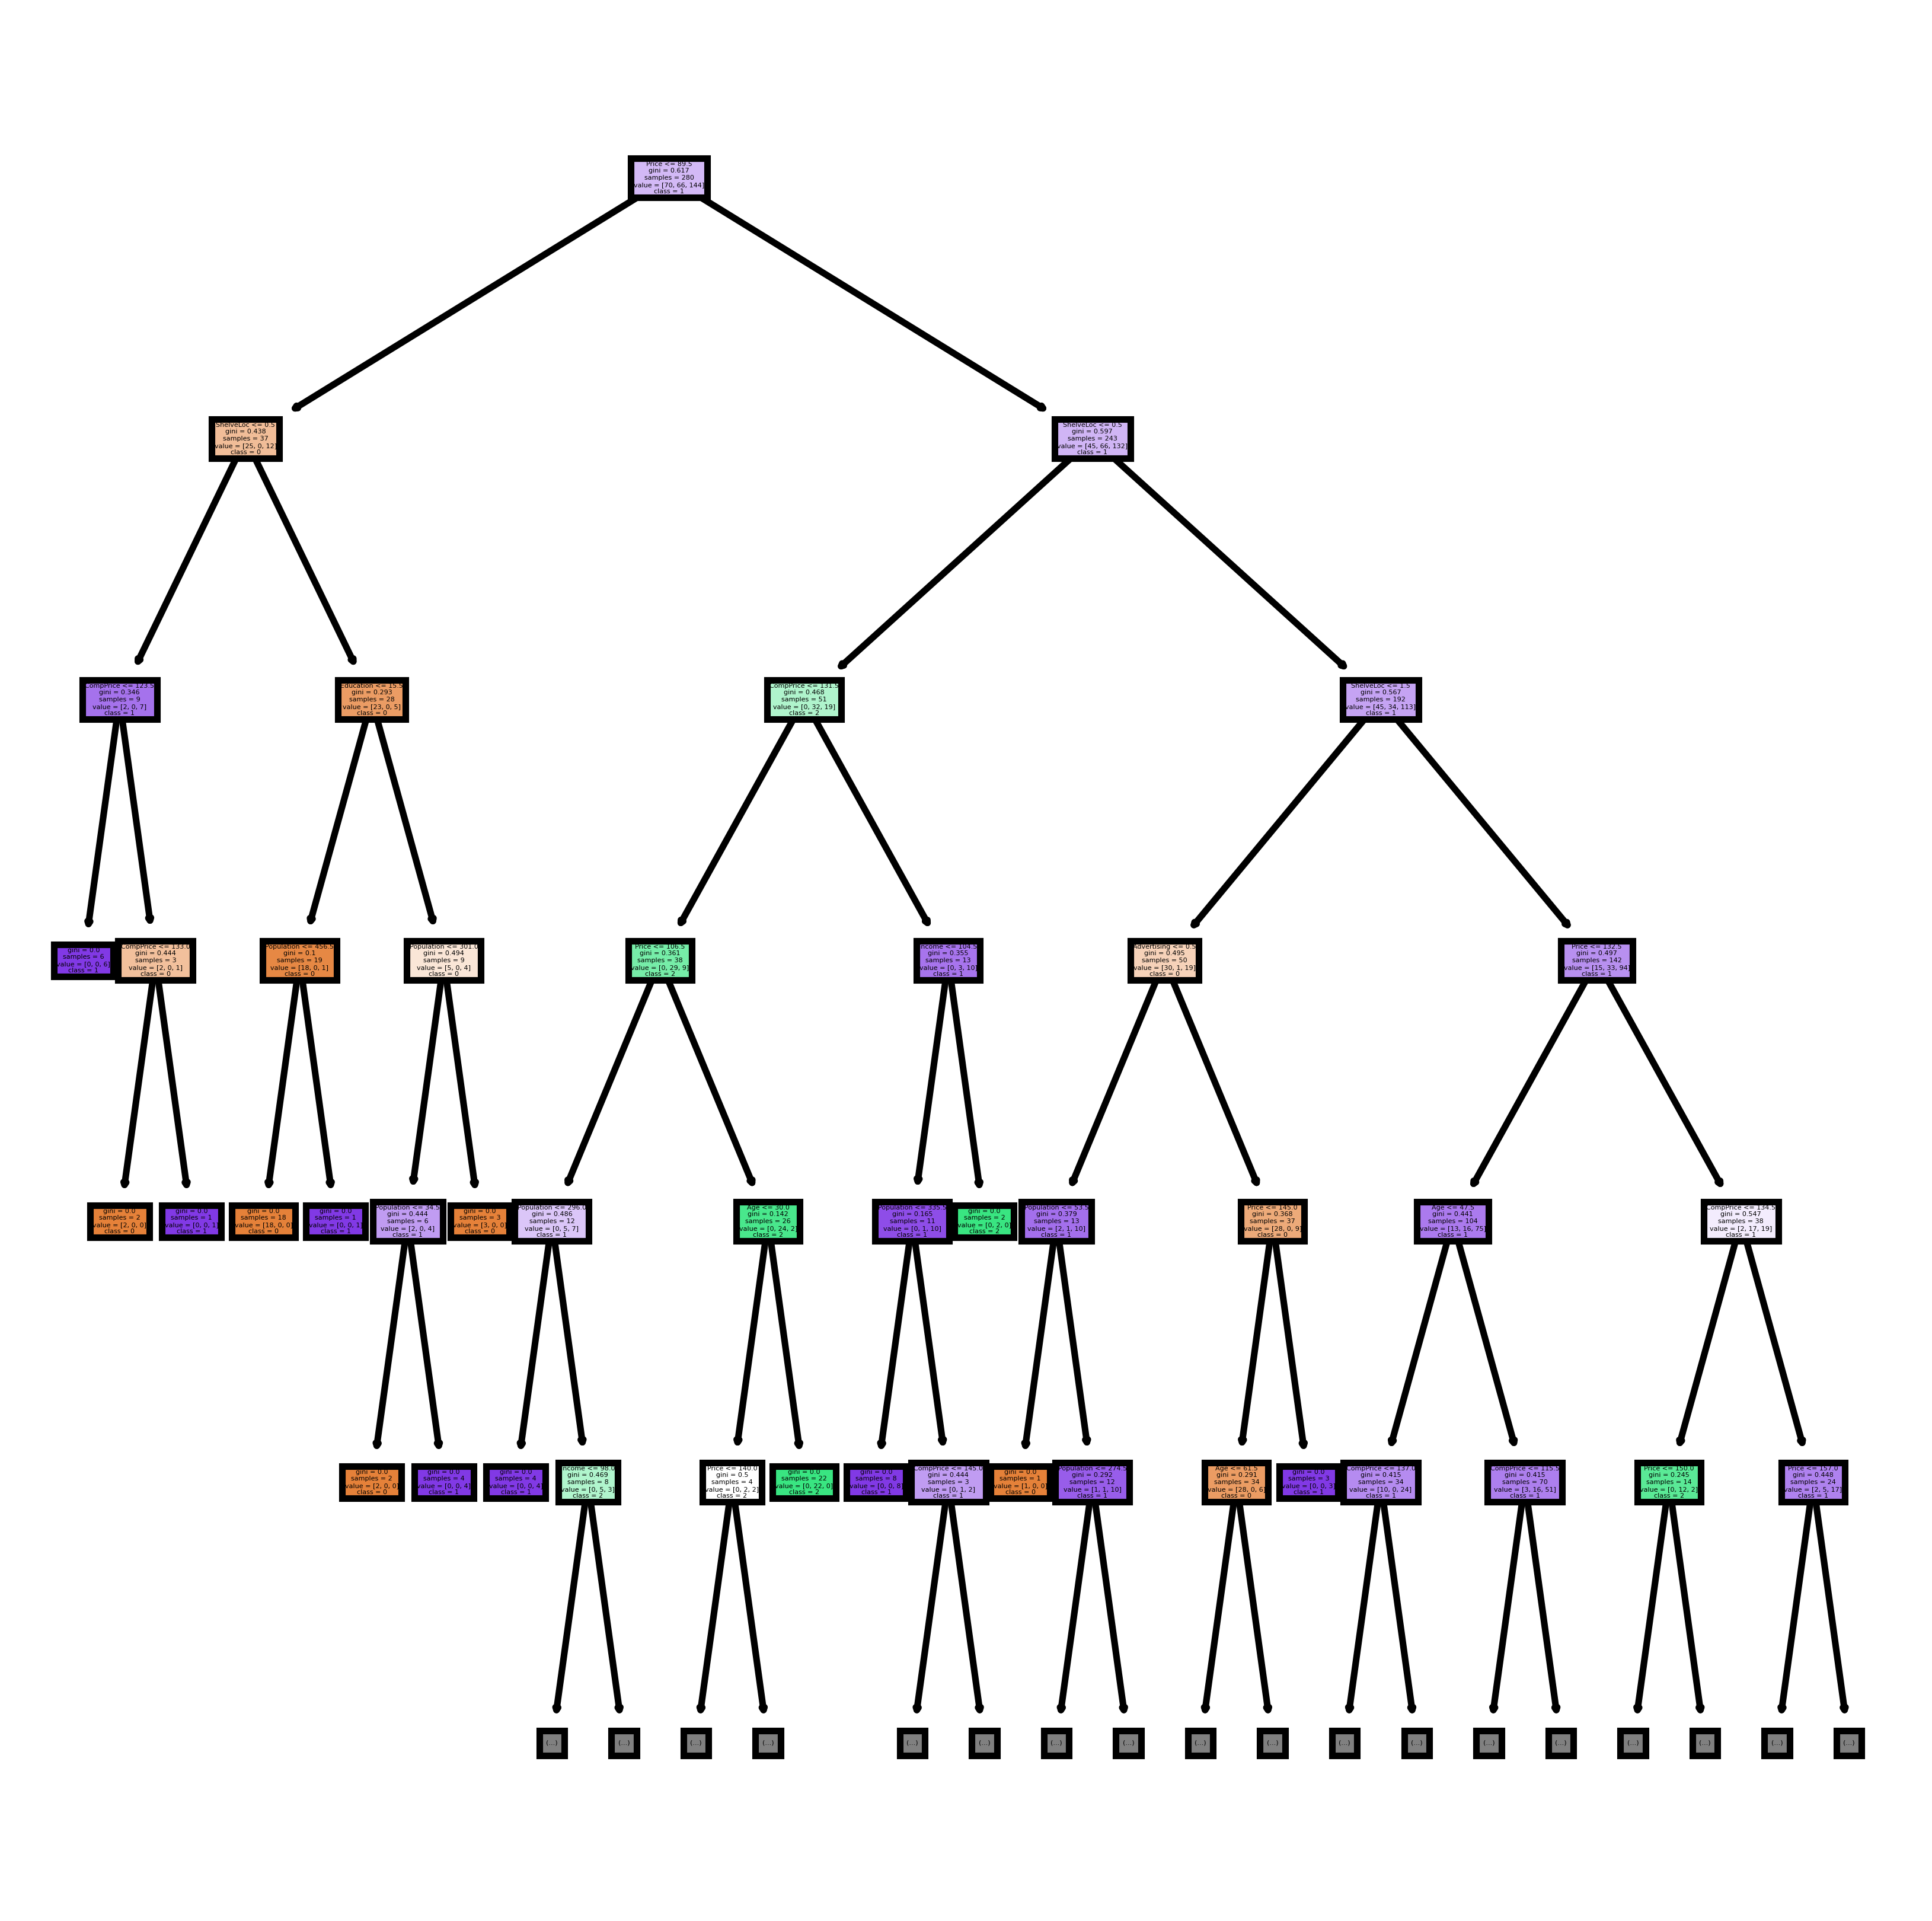

In [204]:
plt.subplots(figsize= (5,5),dpi=800)
tree.plot_tree(model,max_depth=5,feature_names=x.columns,class_names=y.unique().astype(str),filled=True);

In [205]:
y_predict = model.predict(x_test)

Model Evaluation

In [206]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.71      0.52      0.60        29
           1       0.59      0.47      0.52        34
           2       0.58      0.74      0.65        57

    accuracy                           0.61       120
   macro avg       0.63      0.57      0.59       120
weighted avg       0.62      0.61      0.60       120



In [207]:
from sklearn.metrics import confusion_matrix

In [208]:
import seaborn as sns

In [209]:
cm=confusion_matrix(y_test,y_predict)
cm

array([[15,  1, 13],
       [ 1, 16, 17],
       [ 5, 10, 42]])

<Axes: >

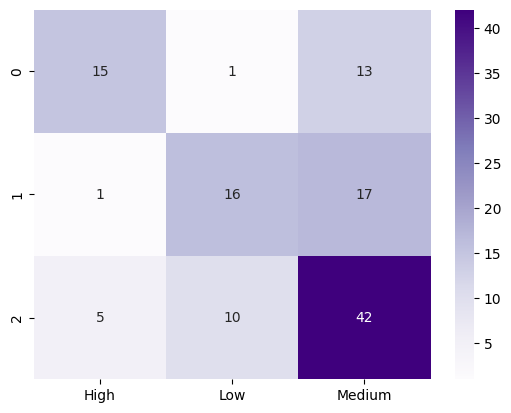

In [210]:
sns.heatmap(cm,annot=True,cmap="Purples",xticklabels=["High","Low","Medium"])